In [3]:
import torch
import matplotlib.pyplot as plt

In [45]:
W_true = 0.2
b_true = 0.5
e = torch.randn(100, 1) * 0.05  # 노이즈 추가
X = torch.randn(100, 1)
Y = W_true * X + b_true + e


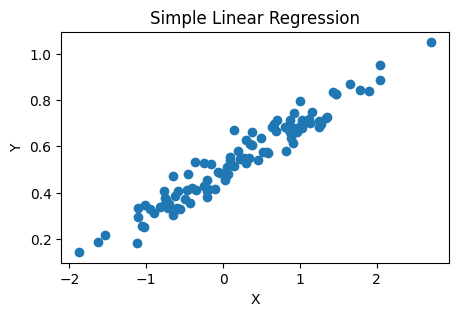

In [46]:
fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(X, Y)
ax.set_title("Simple Linear Regression")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

In [47]:
# 인공신경망
from torch import nn

model = nn.Sequential(
    nn.Linear(1, 1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [48]:
# 파라미터 초기값 확인
for p in model.parameters():
    print(p)  # w, b 순서로 출력됨
    
w, b = model.parameters()
print(w, b)

Parameter containing:
tensor([[-0.9962]], requires_grad=True)
Parameter containing:
tensor([0.6585], requires_grad=True)
Parameter containing:
tensor([[-0.9962]], requires_grad=True) Parameter containing:
tensor([0.6585], requires_grad=True)


Epoch : 0, W : -0.8961862921714783, b:0.6702684760093689, Loss:1.177727460861206
Epoch : 10, W : -0.27181437611579895, b:0.6676620244979858, Loss:0.2167481780052185
Epoch : 20, W : -0.012750288471579552, b:0.6069751381874084, Loss:0.047664765268564224
Epoch : 30, W : 0.10044453293085098, b:0.5603781938552856, Loss:0.01246244553476572
Epoch : 40, W : 0.15182523429393768, b:0.5328030586242676, Loss:0.004528028424829245
Epoch : 50, W : 0.17576241493225098, b:0.5179781317710876, Loss:0.002682826481759548
Epoch : 60, W : 0.18710356950759888, b:0.510360598564148, Loss:0.002248786622658372
Epoch : 70, W : 0.1925336718559265, b:0.5065383315086365, Loss:0.0021462764125317335
Epoch : 80, W : 0.19515033066272736, b:0.5046453475952148, Loss:0.002122031059116125
Epoch : 90, W : 0.19641613960266113, b:0.5037147998809814, Loss:0.0021162936463952065


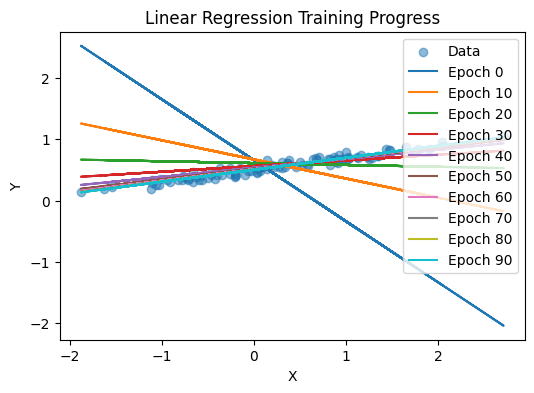

In [49]:
# 모델 학습 과정 확인
from torch import optim

# 하이퍼파라미터
epochs = 100

# 손실함수
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=5e-2)  # 5e-2 = 5 * 0.01

# 저장소 만들기
loss_history = []
ws = []
bs = []

# 플롯 설정 (한 번만 생성하여 여러 개의 선을 추가)
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="Data", alpha=0.5)  # 원본 데이터 산점도


for epoch in range(epochs):
    # 최적화 함수 초기화
    optimizer.zero_grad()
    
    # 예측값 구하기
    yhat = model(X)
    
    # 손실율 계산
    loss = criterion(yhat, Y)
    loss_history.append(loss.item())
    
    # 역전파
    loss.backward()
    
    # 최적화 함수로 파라미터 업데이트
    optimizer.step()

    # 가중치와 절편 저장 (복사해서 저장해야 덮어쓰지 않음)
    w, b = model.parameters()
    ws.append(w.item())
    bs.append(b.item())
    
    # # 출력
    # if epoch % 10 == 0:
    #     print(f"Epoch : {epoch}, W : {w.item()}, b:{b.item()}, Loss:{loss.item()}")

    #     # 그림 그리기
    #     plt.Figure(figsize=(5,3))
    #     plt.scatter(X, Y)
    #     plt.scatter(X, yhat.detach(), color = "red")
    #     plt.title(f"Epoch:" + str(epoch))
    #     plt.show()

    if epoch % 10 == 0:  # 10번째 epoch마다 그래프에 선 추가
        print(f"Epoch : {epoch}, W : {w.item()}, b:{b.item()}, Loss:{loss.item()}")
        plt.plot(X, yhat.detach(), label=f"Epoch {epoch}")

# # 최종 모델의 회귀선 추가
# plt.plot(X, W * X + b, color="black", linestyle="--", label="Final Model")

# 그래프 제목 및 범례 설정
plt.title("Linear Regression Training Progress")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()



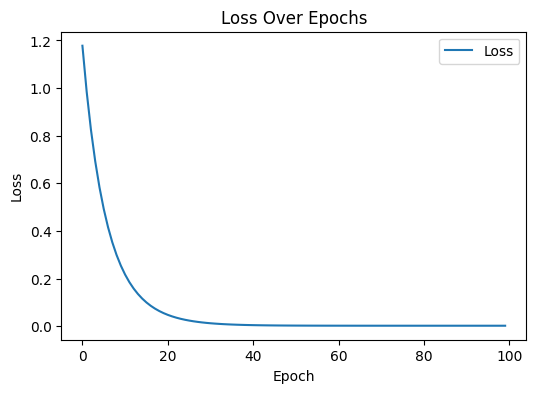

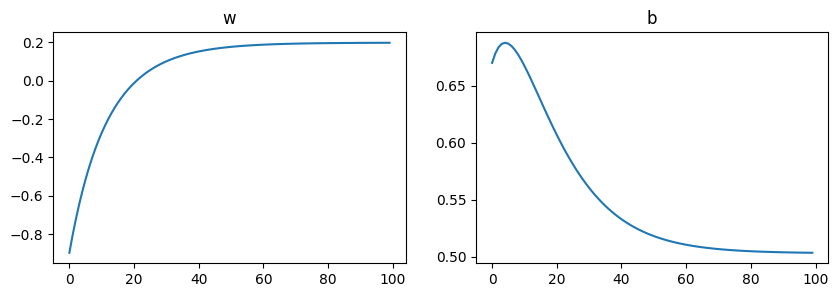

In [54]:

# 최종 Loss 그래프
plt.figure(figsize=(6, 4))
plt.plot(loss_history, label="Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 가중치와 절편 그래프
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(ws)
ax[0].set_title("w")
ax[1].plot(bs)
ax[1].set_title("b")
plt.show()

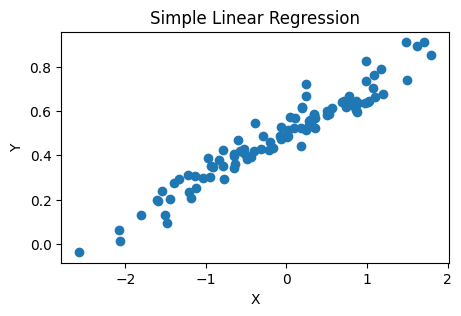

Epoch : 0, W : -0.09302452206611633, b:0.44043439626693726, Loss:0.09415071457624435


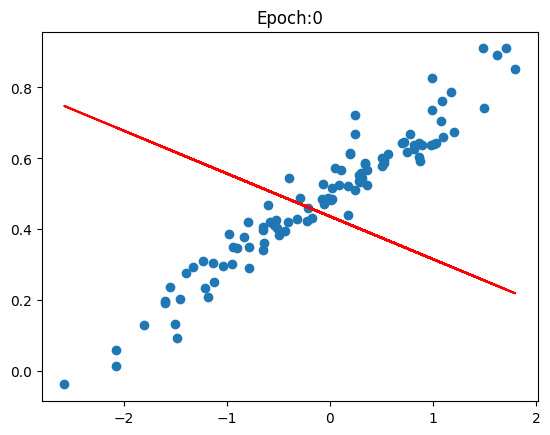

Epoch : 10, W : 0.08088608086109161, b:0.4715765118598938, Loss:0.017959313467144966


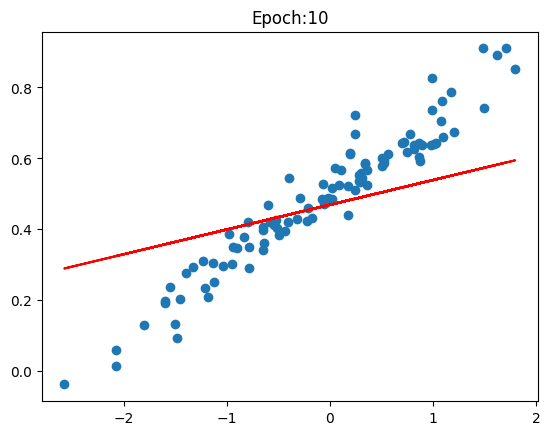

Epoch : 20, W : 0.15122440457344055, b:0.48881396651268005, Loss:0.005189289338886738


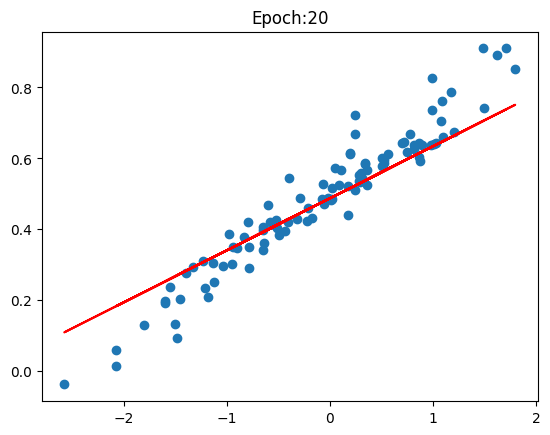

Epoch : 30, W : 0.1798417717218399, b:0.4974115192890167, Loss:0.003018815303221345


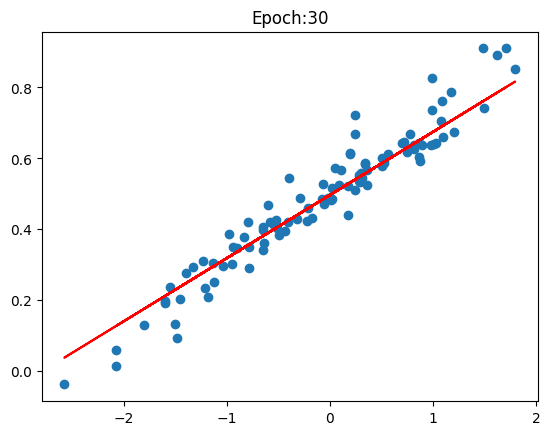

Epoch : 40, W : 0.19154249131679535, b:0.5014644265174866, Loss:0.002646479057148099


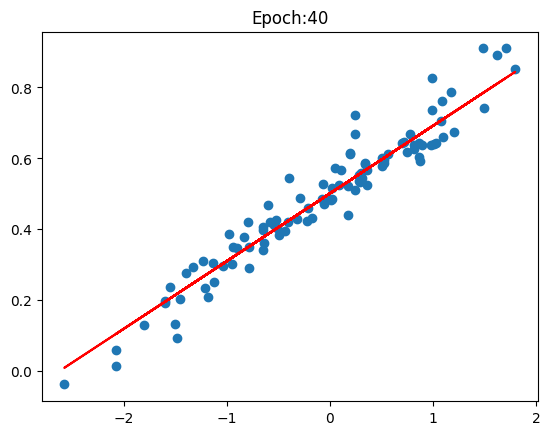

더 이상 업데이트 되지 않아 학습을 종료합니다. 8.801929652690887e-06


In [12]:
import torch
import matplotlib.pyplot as plt
from torch import nn  # 인공신경망
from torch import optim  # 모델 학습 과정 확인

model = nn.Sequential(
    nn.Linear(1, 1)
)

W_true = 0.2
b_true = 0.5
e = torch.randn(100, 1) * 0.05  # 노이즈 추가
X = torch.randn(100, 1)
Y = W_true * X + b_true + e

fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(X, Y)
ax.set_title("Simple Linear Regression")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()


epochs = 100  # 하이퍼파라미터
criterion = nn.MSELoss()  # 손실함수
optimizer = optim.SGD(model.parameters(), lr=5e-2)  # 5e-2 = 5 * 0.01

# 저장소 만들기
loss_history = []
ws = []
bs = []

for epoch in range(epochs):
    optimizer.zero_grad()  # 초기화
    yhat = model(X)  # 예측값 구하기
    loss = criterion(yhat, Y)  # 손실율 계산
    
    # 조건에 다른 조기 학습 종료
    loss_diff = loss_history[-1] - loss if len(loss_history) > 1 else 1
    if loss_diff < 1e-5:
        print("더 이상 업데이트 되지 않아 학습을 종료합니다.", loss_diff.item())
        break
    
    loss_history.append(loss.item())
    loss.backward()  # 역전파
    optimizer.step()  # 최적화함수로 파라미터 업데이트
    
    # 가중치와 절편 저장 (복사해서 저장해야 덮어쓰지 않음)
    w, b = model.parameters()
    ws.append(w.item())
    bs.append(b.item())
    
    # 출력
    if epoch % 10 == 0:
        print(f"Epoch : {epoch}, W : {w.item()}, b:{b.item()}, Loss:{loss.item()}")

        # 그림 그리기
        plt.Figure(figsize=(5,3))
        plt.scatter(X, Y)
        plt.plot(X, yhat.detach(), color = "red")
        plt.title(f"Epoch:" + str(epoch))
        plt.show()

# # 최종 모델의 회귀선 추가
# plt.plot(X, W * X + b, color="black", linestyle="--", label="Final Model")


